In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresh

In [7]:
def segment_words(image):
    # Menjalankan praproses pada gambar
    processed_image = preprocess_image(image)

    # Mencari kontur pada gambar biner
    contours, _ = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    words = []
    if contours:  # Memeriksa apakah terdapat kontur yang ditemukan
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            area = cv2.contourArea(contour)

            # Mengabaikan kontur yang terlalu kecil atau terlalu besar
            if area > 100 and area < 10000:
                word = image[y:y+h, x:x+w]
                words.append((word, (x, y, w, h)))  # Menyimpan kata dan persegi kotaknya

    return words

In [8]:
# Membaca gambar
image = cv2.imread("nama-Copy1.png")

In [9]:
# Melakukan segmentasi kata pada gambar
words = segment_words(image)

In [10]:
# Menampilkan gambar dengan persegi pada tiap kata yang tersegmentasikan
segmented_image = image.copy()
for word, (x, y, w, h) in words:
    cv2.rectangle(segmented_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

Text(0.5, 1.0, 'Segmented Image')

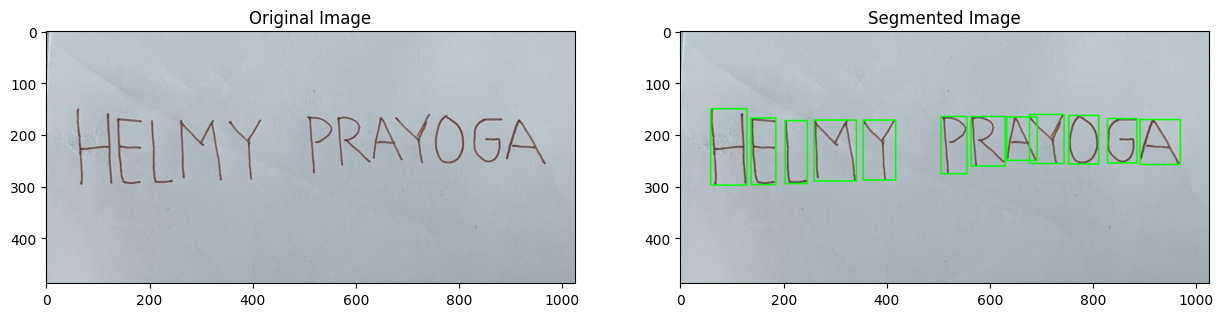

In [11]:
fig,axes = plt.subplots(1,2,figsize=(15,11))
ax = axes.ravel()

ax[0].imshow(image,cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(segmented_image,cmap="gray")
ax[1].set_title("Segmented Image")